<a href="https://colab.research.google.com/github/Cordova0397/Carlos_Cordova_EC3/blob/master/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Librerias y data

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Revisando campos Nulos de la columna  Item_Identifier

In [63]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [64]:
data = df[df['Item_Weight'].isna()]
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [65]:
gb = df.groupby('Item_Identifier')['Item_Weight'].agg(['min', 'max','mean'])
gb

,min,max,mean
Item_Identifier,,,
DRA12,11.600,11.600,11.600
DRA24,19.350,19.350,19.350
DRA59,8.270,8.270,8.270
DRB01,7.390,7.390,7.390
DRB13,6.115,6.115,6.115
...,...,...,...
NCZ30,6.590,6.590,6.590
NCZ41,19.850,19.850,19.850
NCZ42,10.500,10.500,10.500


Observamos que cada valor unico de la columna Item_Identifie poseen un unico peso lo cual nos permite inputar los valores nulos de la columna

In [66]:
peso_por_item = df.groupby('Item_Identifier')['Item_Weight'].mean()
mapeo_peso_por_item = peso_por_item.to_dict()
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(mapeo_peso_por_item))


Asignamos el peso correspondiendo a los campos nulos

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Comprobamos los cambios y vemos que aun quedan ciertos valores nulos en la columna

In [68]:
item_nulo = df[df['Item_Weight'].isna()]
item_nulo.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


No podemos determinar el peso para estos productos y procedemos a eliminarloss

In [69]:
dato = df[df['Item_Type'] == 'Frozen Foods']
dato.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
24,FDR28,13.850,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250
51,FDM40,10.195,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
75,FDC29,8.390,Regular,0.024206,Frozen Foods,114.0176,OUT046,1997,Small,Tier 1,Supermarket Type1,2290.3520
78,FDL04,19.000,Low Fat,0.112557,Frozen Foods,104.9622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1587.9330
81,FDN04,11.800,reg,0.014087,Frozen Foods,180.3344,OUT046,1997,Small,Tier 1,Supermarket Type1,1427.4752
95,FDU04,7.930,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.150,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300


# Revisando campos Nulos de la columna Outlet_Size

In [70]:
Outlet_nulo = df[df['Outlet_Size'].isna()]
Outlet_nulo.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [71]:
df.prueba = df.copy()
# Mapear las categorías a valores numéricos
mapping_size = {'Small': 1, 'Medium': 2, 'High': 3}
df.prueba['Outlet_Size_Num'] = df.prueba['Outlet_Size'].map(mapping_size)

# Agrupar y calcular las estadísticas
gb2 = df.prueba.groupby('Outlet_Identifier')['Outlet_Size_Num'].agg(['min', 'max', 'mean'])

# Renombrar las columnas
gb2.columns = ['min_size', 'max_size', 'mean_size']
gb2

<ipython-input-71-233a0f4c84cb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.prueba = df.copy()


,min_size,max_size,mean_size
Outlet_Identifier,,,
OUT010,NaN,NaN,NaN
OUT013,3.0,3.0,3.0
OUT017,NaN,NaN,NaN
OUT018,2.0,2.0,2.0
OUT019,1.0,1.0,1.0
OUT027,2.0,2.0,2.0
OUT035,1.0,1.0,1.0
OUT045,NaN,NaN,NaN
OUT046,1.0,1.0,1.0


* Filtramos los valores Unicos de la columna Outlet_Identifier en relacion a los valores de la columna Outlet_Size

In [72]:
valor1 = df[df['Outlet_Identifier'] == 'OUT010']
valor1['Outlet_Location_Type'].value_counts()

Tier 3    555
Name: Outlet_Location_Type, dtype: int64

In [73]:
out_type2 = df[df['Outlet_Location_Type'] == 'Tier 3']
out_type2['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

* Tier 3 cotiene 2 Medidas: Medium y High

In [74]:
valor_1 = df[df['Outlet_Identifier'] == 'OUT010']
valor_1['Outlet_Type'].value_counts()

Grocery Store    555
Name: Outlet_Type, dtype: int64

In [75]:
filtrado = df[df['Outlet_Type'] == 'Grocery Store']
filtrado['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

Como Indentidicar el Tier 3 no es suficiente para determinar la medida del Outlet usamos Outlet_Type como identidicador para determinar cual es su medida correspondiente y encontramos que es Small

In [76]:
valor2 = df[df['Outlet_Identifier'] == 'OUT017']
valor2['Outlet_Location_Type'].value_counts()

Tier 2    926
Name: Outlet_Location_Type, dtype: int64

In [77]:
valor3 = df[df['Outlet_Identifier'] == 'OUT045']
valor3['Outlet_Location_Type'].value_counts()

Tier 2    929
Name: Outlet_Location_Type, dtype: int64

OUT045 y OUT017 Tienen como Outlet_Location_Type. Eso quiere decir que los valores nulos que contenga se puden inputar por la medida Small

In [78]:
out_type = df[df['Outlet_Location_Type'] == 'Tier 2']
out_type['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

Encontramos que cuando el Outlet_Location_Type es Tier 2, todas sus Outlet_Size son tipo Small

* Podemos determinar que Tier 3 Presenta 3 medidas de las cuales en la data solo estan registradas 2 (Medium y High), mientras que Tier 2 solo presenta la medida Small
* Se concluye que los valores nulos del tamaño de los Outlet son Small

In [79]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

Usamos el meotodo para reemplazar los nulos

In [80]:
df = df.dropna()
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [81]:
df.duplicated().sum()

0

Borramos las filas con datos nulos y verficamos que no hayan filas duplicadas

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


# Graficos

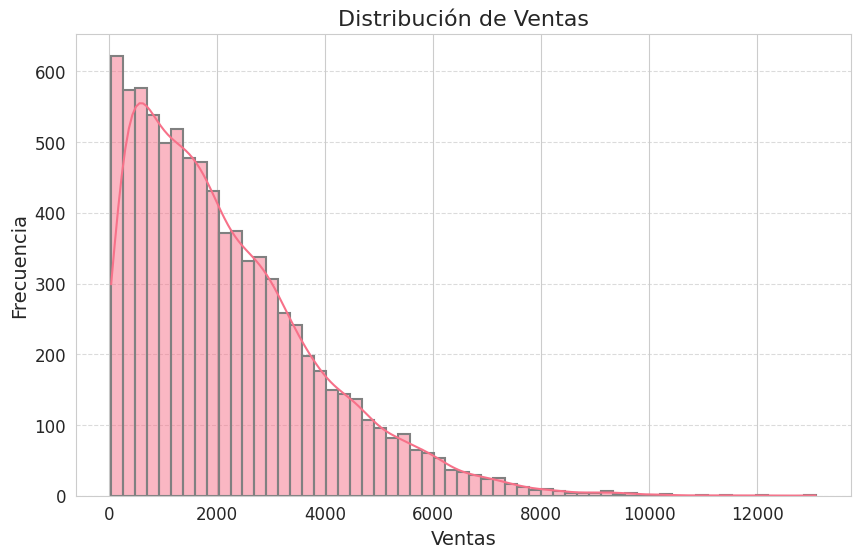

In [83]:
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 10)
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], kde=True, color=palette[0], edgecolor='gray', linewidth=1.5)
plt.title('Distribución de Ventas', fontsize=16)
plt.xlabel('Ventas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Este gráfico busca mostrar la distribución de las ventas de productos en los diferentes puntos de venta.**

<ipython-input-84-35aad0a6608d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='muted')


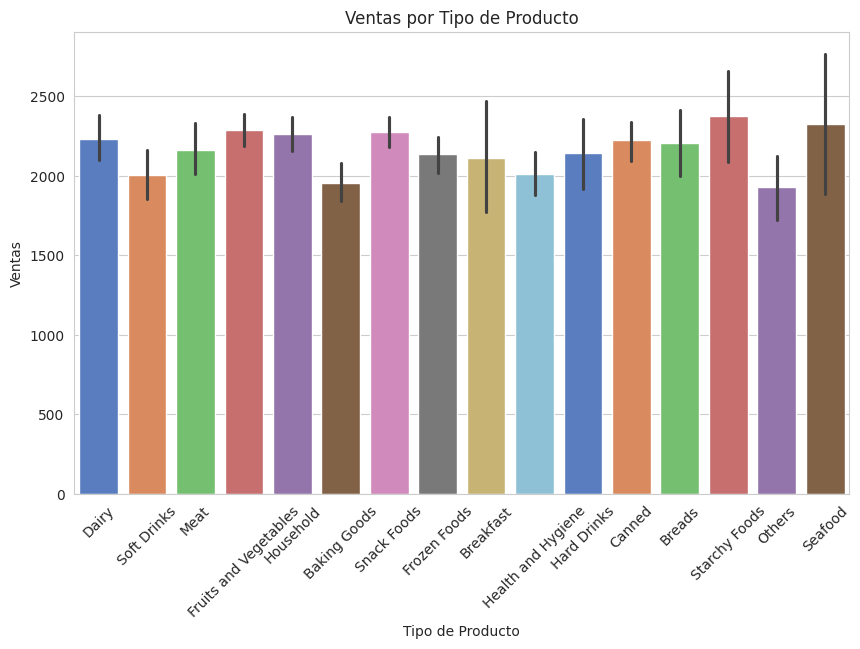

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='muted')
plt.title('Ventas por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

<ipython-input-85-ef69e82ca70b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='pastel')


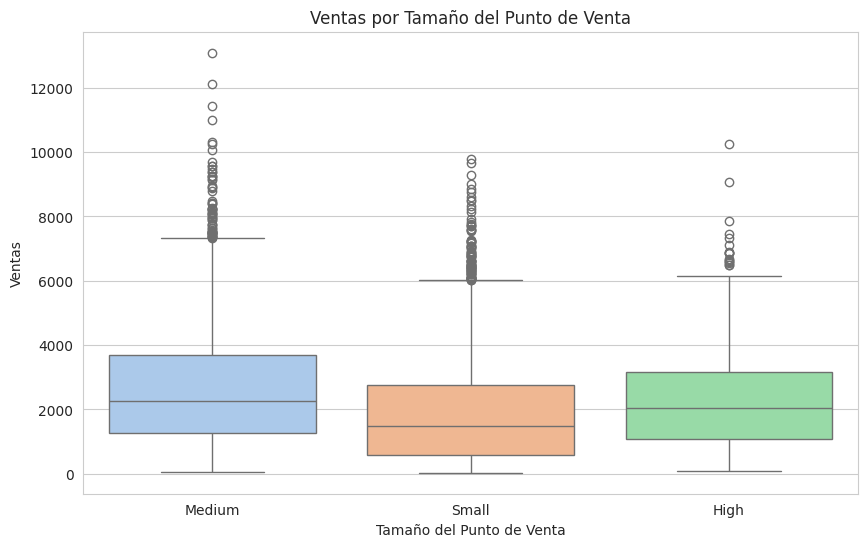

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='pastel')
plt.title('Ventas por Tamaño del Punto de Venta')
plt.xlabel('Tamaño del Punto de Venta')
plt.ylabel('Ventas')
plt.show()

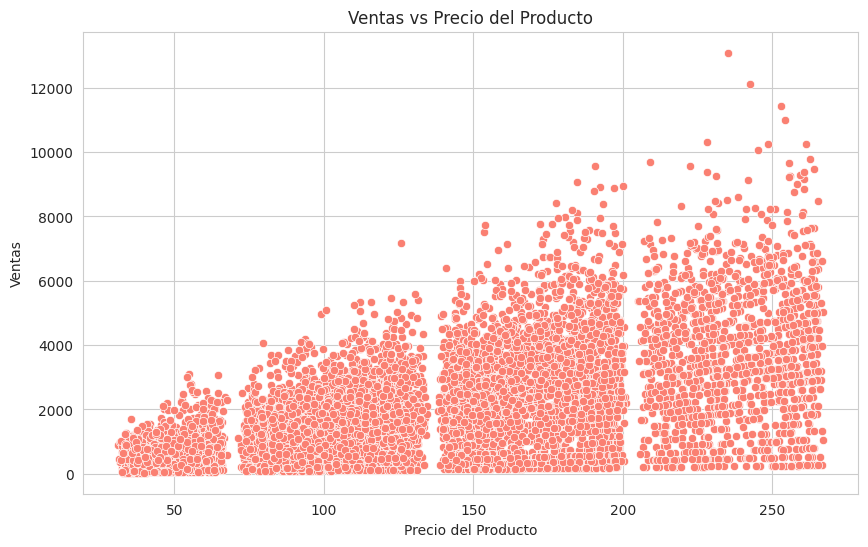

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, color='salmon')
plt.title('Ventas vs Precio del Producto')
plt.xlabel('Precio del Producto')
plt.ylabel('Ventas')
plt.show()

<ipython-input-87-5204f3a41214>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, estimator=sum, ci=None, palette='rocket')
<ipython-input-87-5204f3a41214>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, estimator=sum, ci=None, palette='rocket')


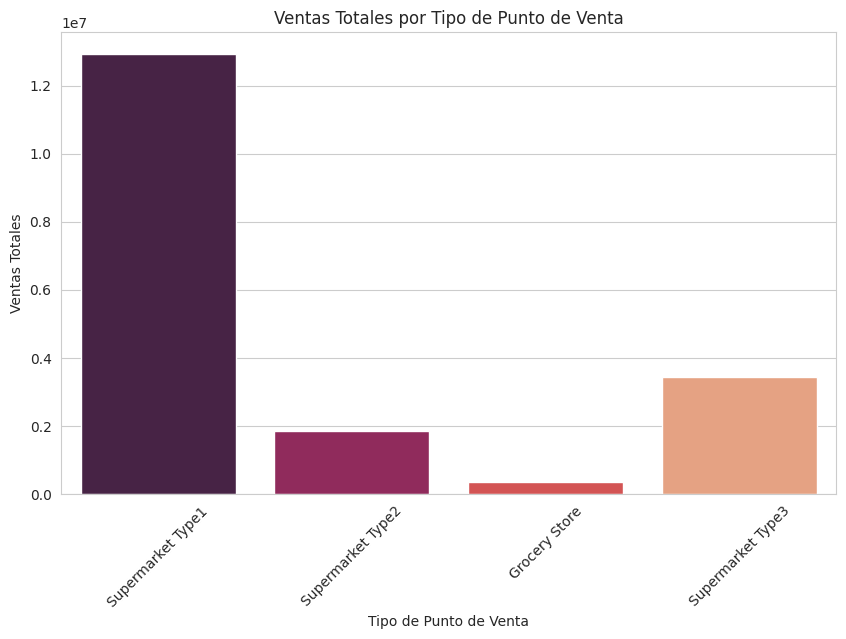

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, estimator=sum, ci=None, palette='rocket')
plt.title('Ventas Totales por Tipo de Punto de Venta')
plt.xlabel('Tipo de Punto de Venta')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()